This notebook contains a dump of plots describing how the different sampling variances $\sigma_w^2, \sigma_b^2$, the depth, the nonlinearity, and the type of kernel conspire to change fractional variances.
It serves as a resource for curious reader who wants to dig deeper after reading our paper [*A Fine-Grained Spectral Perspective on Neural Networks*](https://arxiv.org/abs/1907.10599) or one of the other notebooks *[Neural Network Generalization](NeuralNetworkGeneralization.ipynb)* and *[Clarifying Simplicity Bias](ClarifyingSimplicityBias.ipynb)* in this repo.
There is little commentary here, just a series of plots, with (hopefully) self-explanatory labels.

In [1]:
import numpy as np
import scipy as sp
from scipy.special import erf as erf
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
sns.set()
from mpl_toolkits.axes_grid1 import ImageGrid
def tight_layout(plt):
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [2]:
from theory import *

In [3]:
erfvbrange = np.linspace(0, 4, num=41)
erfvwrange = np.linspace(1, 5, num=41)
erfvws, erfvbs = np.meshgrid(erfvwrange, erfvbrange, indexing='ij')
dim = 128
depth = 128
maxdeg = 8

erfkervals = boolcubeFgrid(dim, depth, erfvws, erfvbs, VErf, VDerErf)

erfeigs = {}
erfeigs['ck'] = relu(boolCubeMuAll(dim, maxdeg, erfkervals['cks']))
erfeigs['ntk'] = relu(boolCubeMuAll(dim, maxdeg, erfkervals['ntks']))

erfeigs['ckfracvar'] = (
    sp.special.binom(dim, np.arange(0, maxdeg+1))[:, None, None, None]
    * erfeigs['ck']
)
erfeigs['ntkfracvar'] = (
    sp.special.binom(dim, np.arange(0, maxdeg+1))[:, None, None, None]
    * erfeigs['ntk']
)

In [4]:
reluvws, reluvbs = np.meshgrid([2], np.linspace(0, 4, num=401), indexing='ij')
dim = 128
depth = 128
maxdeg = 8

relukervals = boolcubeFgrid(dim, depth, reluvws, reluvbs, VReLU, VStep)

relueigs = {}
relueigs['ck'] = relu(boolCubeMuAll(dim, maxdeg, relukervals['cks']))
relueigs['ntk'] = relu(boolCubeMuAll(dim, maxdeg, relukervals['ntks']))
relueigs['ckfracvar'] = (
    sp.special.binom(dim, np.arange(0, maxdeg+1))[:, None, None, None]
    * relueigs['ck']
)
relueigs['ntkfracvar'] = (
    sp.special.binom(dim, np.arange(0, maxdeg+1))[:, None, None, None]
    * relueigs['ntk']
)

# ReLU Fractional Variances, as Functions of $\sigma_b^2$ and Depth, Fixing $\sigma_w^2 = 2$

In [5]:
def relu_plot_all(tp, title):
    plt.figure(figsize=(16, 6))
    depthvb_grid = np.meshgrid(np.arange(1, 129), reluvbs, indexing='ij')
    for i, deg in enumerate(list(range(0, 9, 2)) + list(range(1, 9, 2))):
        plt.subplot(2,5,i+1)
        plt.contourf(depthvb_grid[0], depthvb_grid[1], relueigs[tp][deg][1:].squeeze())
        plt.xlabel('depth')
        if i in [0, 5]:
            plt.ylabel(u"$\sigma_b^2$")
        plt.semilogx()
        plt.title('degree {}'.format(deg))
        plt.colorbar()
    plt.suptitle(title)
    tight_layout(plt)

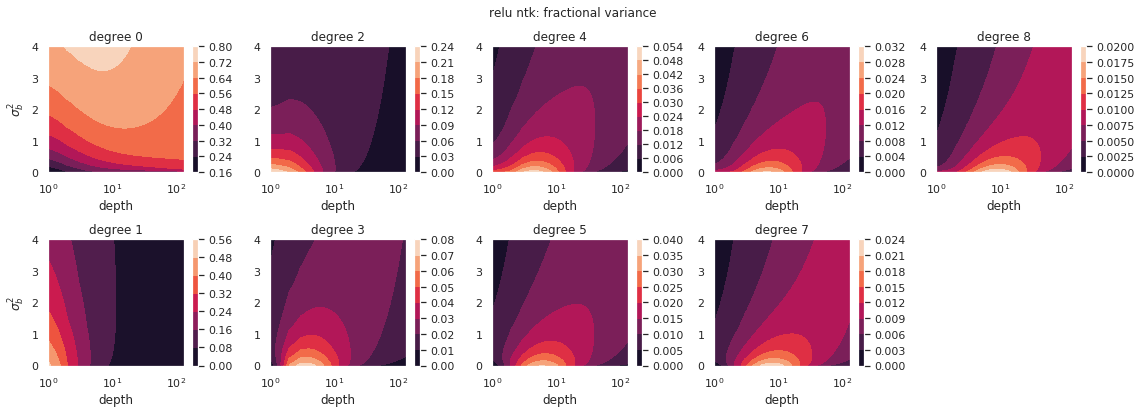

In [6]:
relu_plot_all('ntkfracvar', 'relu ntk: fractional variance')

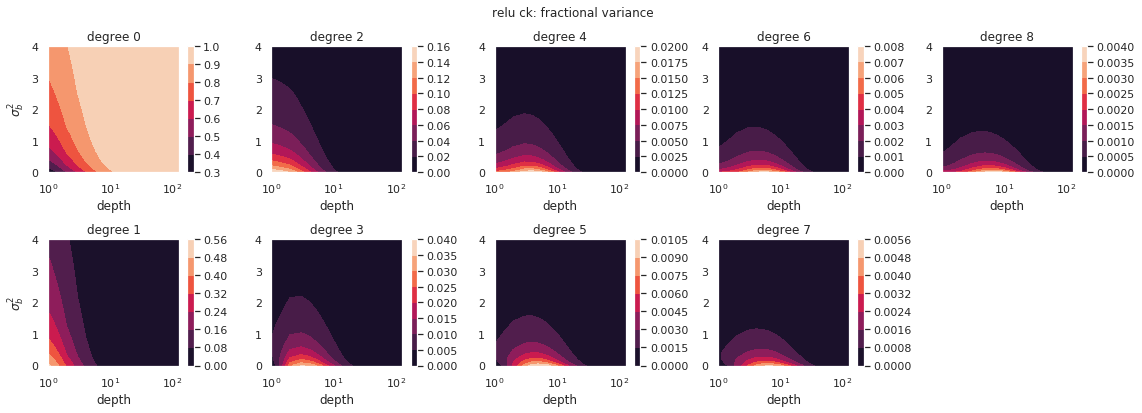

In [7]:
relu_plot_all('ckfracvar', 'relu ck: fractional variance')

# Erf Fractional Variances, as Functions of $\sigma_w^2$ and Depth, Sliced by Fixed Values of $\sigma_b^2$

## NTK

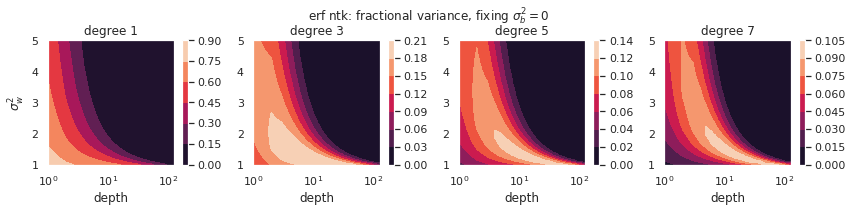

In [8]:
tp = 'ntkfracvar'
plt.figure(figsize=(12, 3.05))
depthvw_grid = np.meshgrid(np.arange(1, 129), erfvwrange, indexing='ij')
for i, deg in enumerate(list(range(1, 9, 2))):
    plt.subplot(1,4,i+1)
    plt.contourf(depthvw_grid[0], depthvw_grid[1], erfeigs[tp][deg][1:, :, 0])
    plt.xlabel('depth')
    if i in [0, 5]:
        plt.ylabel(u"$\sigma_w^2$")
    plt.semilogx()
    plt.title('degree {}'.format(deg))
    plt.colorbar()
plt.suptitle(u'erf ntk: fractional variance, fixing $\sigma_b^2 = 0$')
tight_layout(plt)

In [9]:
def erf_plot_vbslices(vbidx, tp, title):
    plt.figure(figsize=(16, 6))
    depthvw_grid = np.meshgrid(np.arange(1, 129), erfvwrange, indexing='ij')
    for i, deg in enumerate(list(range(0, 9, 2)) + list(range(1, 9, 2))):
        plt.subplot(2,5,i+1)
        plt.contourf(depthvw_grid[0], depthvw_grid[1], erfeigs[tp][deg][1:, :, vbidx])
        plt.xlabel('depth')
        if i in [0, 5]:
            plt.ylabel(u"$\sigma_w^2$")
        plt.semilogx()
        plt.title('degree {}'.format(deg))
        plt.colorbar()
    plt.suptitle(title)
    tight_layout(plt)

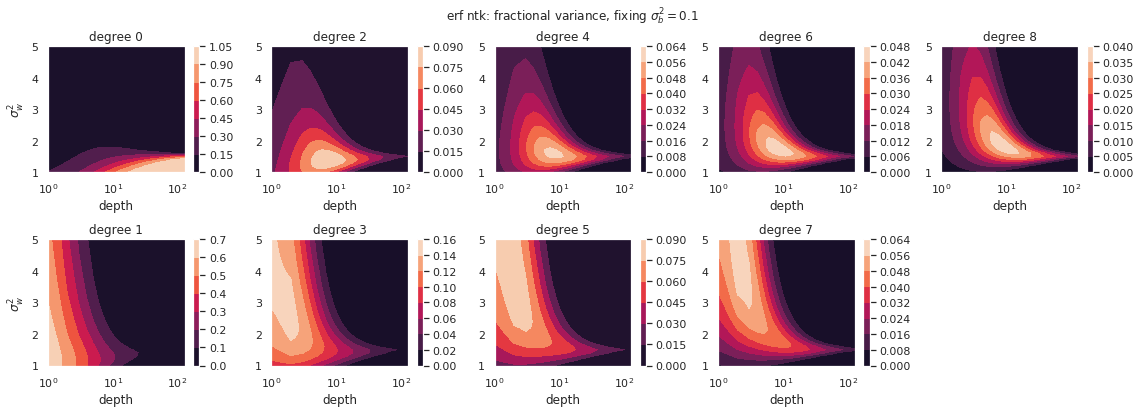

In [10]:
erf_plot_vbslices(1, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_b^2 = 0.1$')

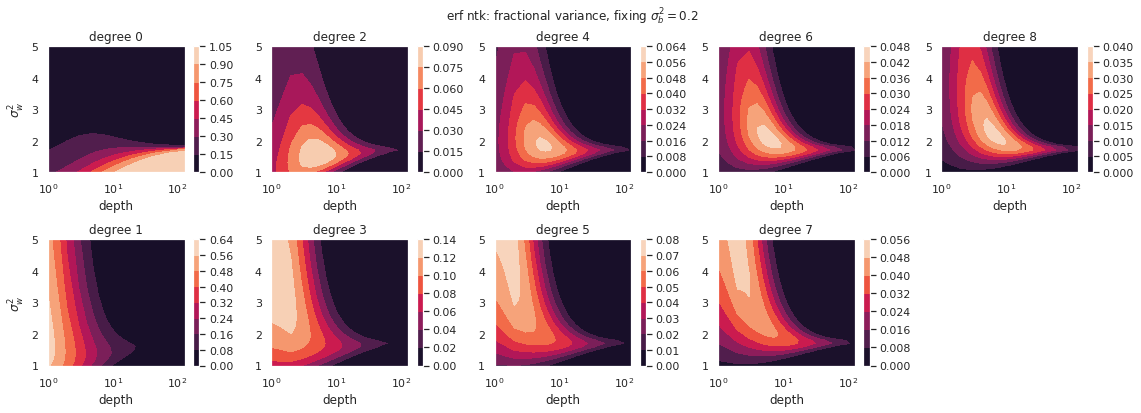

In [11]:
erf_plot_vbslices(2, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_b^2 = 0.2$')

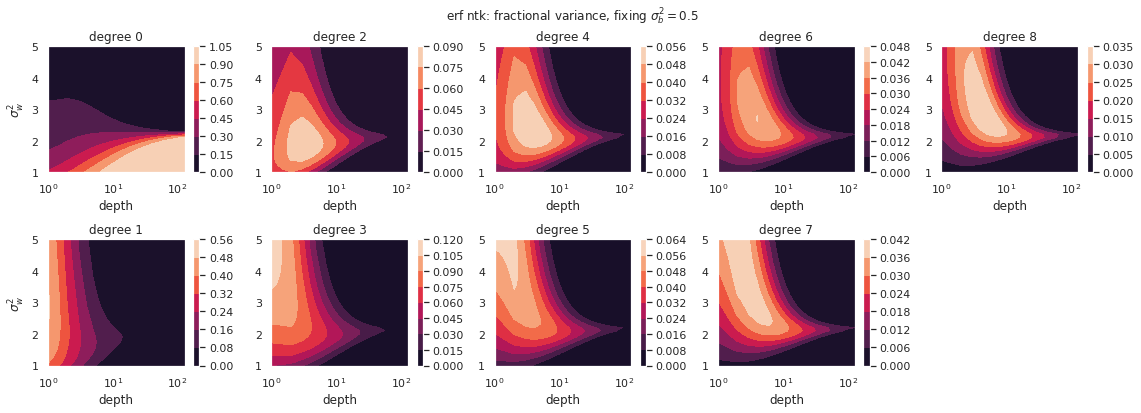

In [12]:
erf_plot_vbslices(5, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_b^2 = 0.5$')

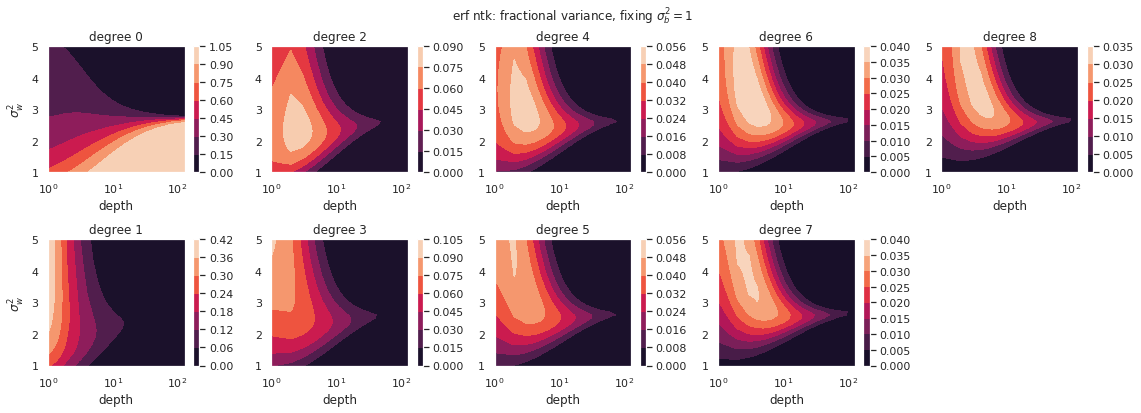

In [13]:
erf_plot_vbslices(10, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_b^2 = 1$')

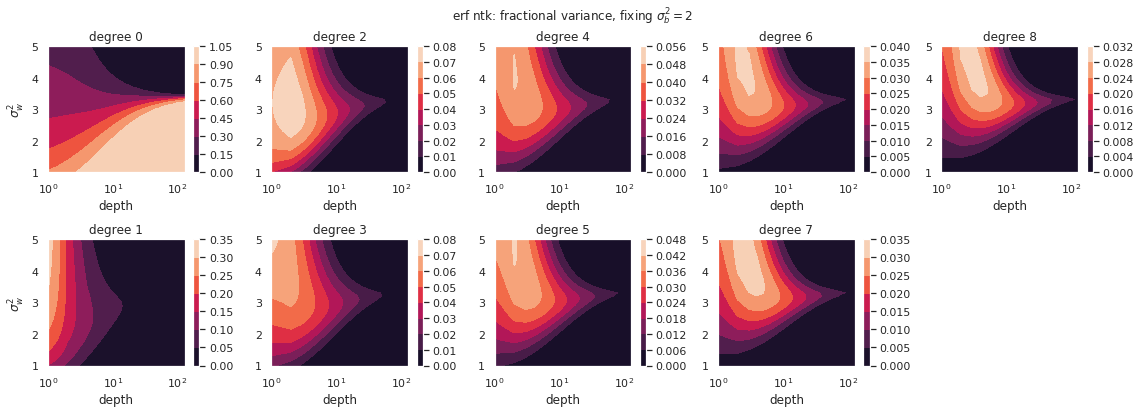

In [14]:
erf_plot_vbslices(20, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_b^2 = 2$')

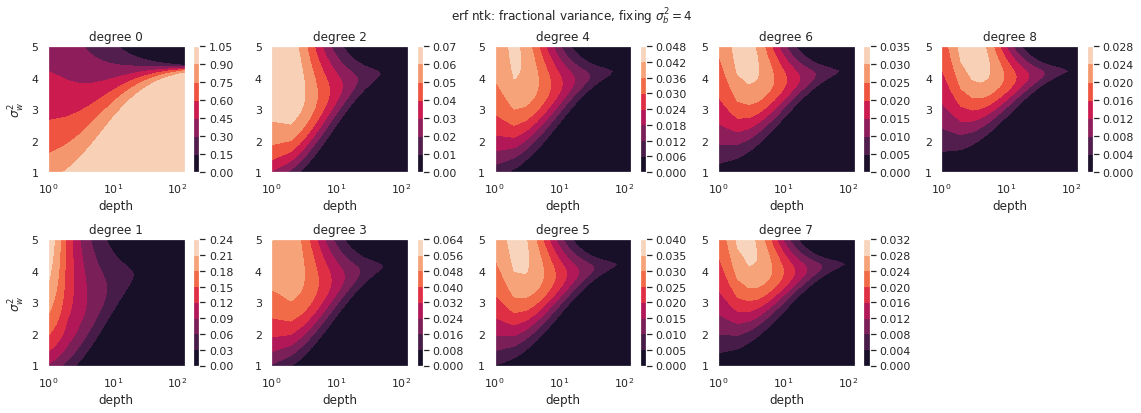

In [15]:
erf_plot_vbslices(40, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_b^2 = 4$')

## CK

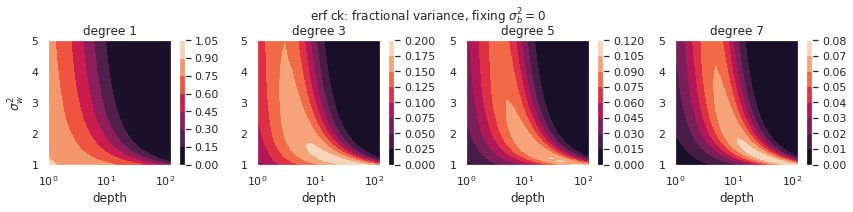

In [16]:
tp = 'ckfracvar'
plt.figure(figsize=(12, 3.05))
depthvw_grid = np.meshgrid(np.arange(1, 129), erfvwrange, indexing='ij')
for i, deg in enumerate(list(range(1, 9, 2))):
    plt.subplot(1,4,i+1)
    plt.contourf(depthvw_grid[0], depthvw_grid[1], erfeigs[tp][deg][1:, :, 0])
    plt.xlabel('depth')
    if i in [0, 5]:
        plt.ylabel(u"$\sigma_w^2$")
    plt.semilogx()
#     plt.ylim([0, 1])
    plt.title('degree {}'.format(deg))
    plt.colorbar()
plt.suptitle(u'erf ck: fractional variance, fixing $\sigma_b^2 = 0$')
tight_layout(plt)
# plt.savefig('figures/erfck_fracvar_vb0.pdf', bbox_inches = "tight")

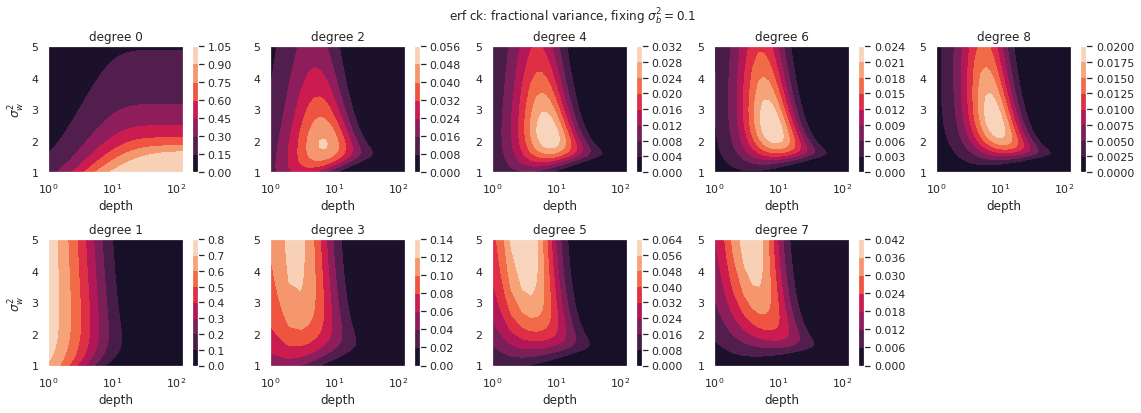

In [17]:
erf_plot_vbslices(1, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_b^2 = 0.1$')

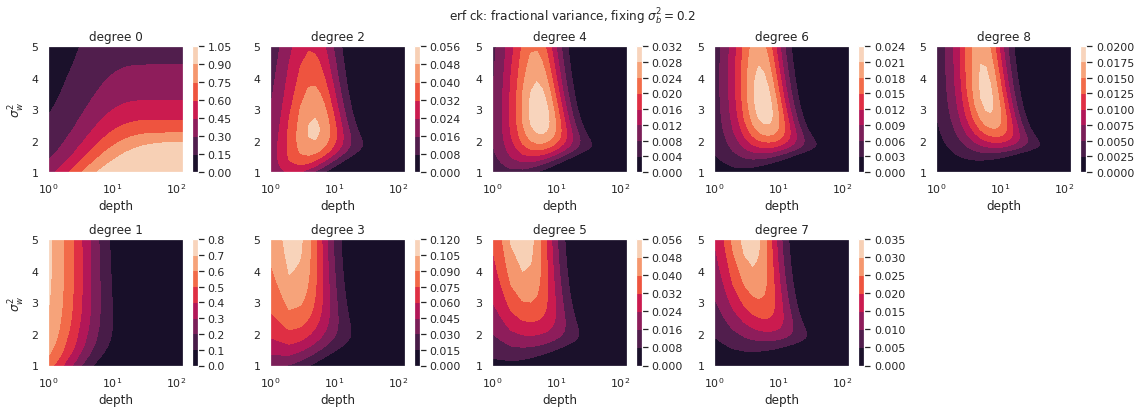

In [18]:
erf_plot_vbslices(2, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_b^2 = 0.2$')

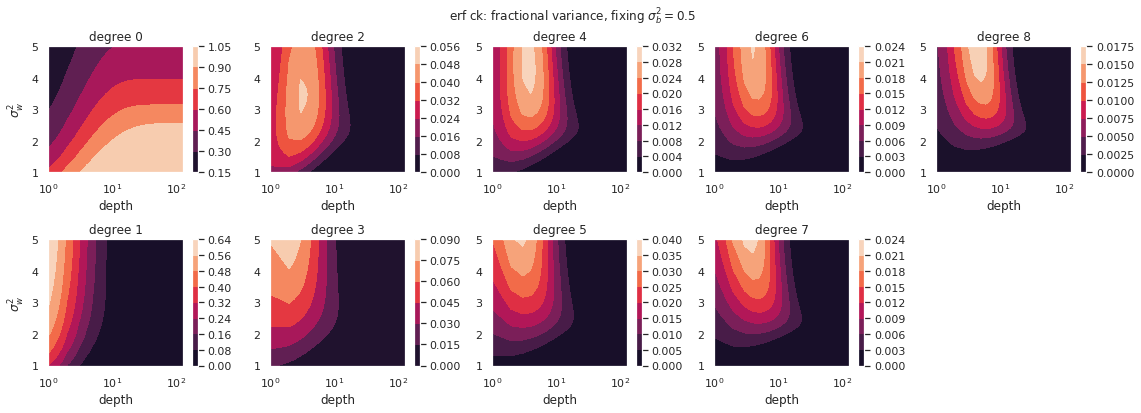

In [19]:
erf_plot_vbslices(5, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_b^2 = 0.5$')

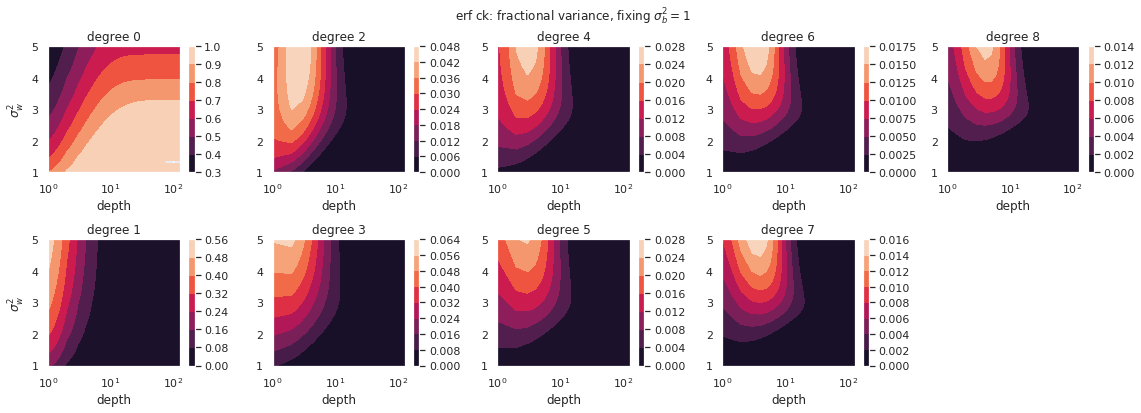

In [20]:
erf_plot_vbslices(10, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_b^2 = 1$')

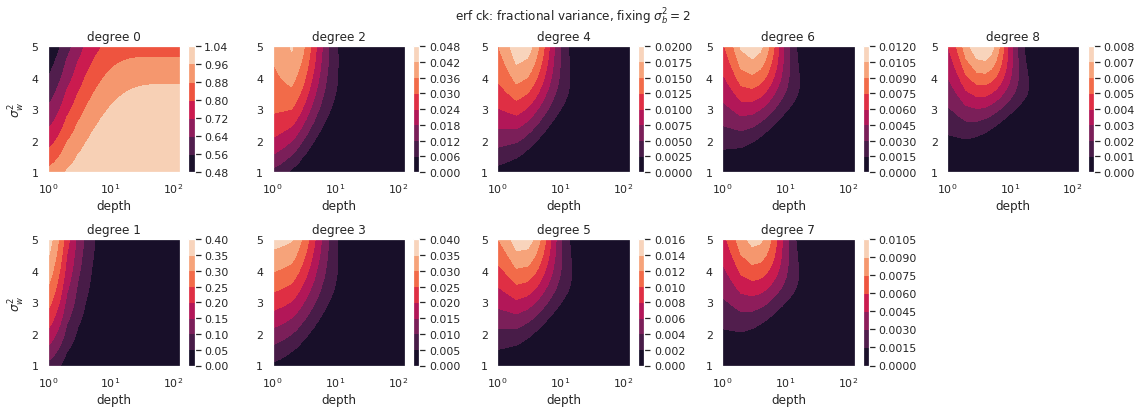

In [21]:
erf_plot_vbslices(20, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_b^2 = 2$')

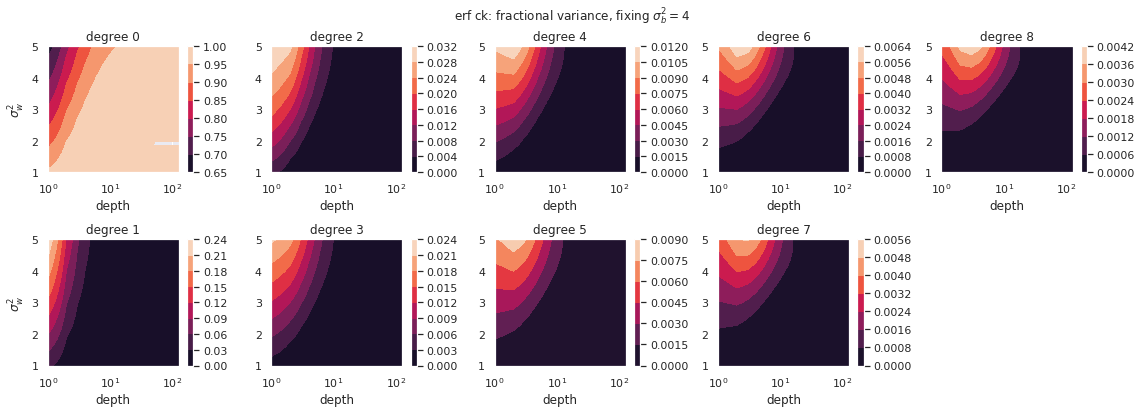

In [22]:
erf_plot_vbslices(40, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_b^2 = 4$')

# Erf Fractional Variances, as Functions of $\sigma_w^2$ and $\sigma_b^2$, Sliced by Fixed Depth

## NTK

In [23]:
def erf_plot_depthslices(depth, tp, title):
    plt.figure(figsize=(16, 6))
    vbvw_grid = np.meshgrid(erfvbrange, erfvwrange, indexing='ij')
    for i, deg in enumerate(list(range(0, 9, 2)) + list(range(1, 9, 2))):
        plt.subplot(2,5,i+1)
        plt.contourf(vbvw_grid[0], vbvw_grid[1], erfeigs[tp][deg][depth, :, :].T)
        plt.xlabel(u"$\sigma_b^2$")
        if i in [0, 5]:
            plt.ylabel(u"$\sigma_w^2$")
        plt.title('degree {}'.format(deg))
        plt.colorbar()
    plt.suptitle(title)
    tight_layout(plt)

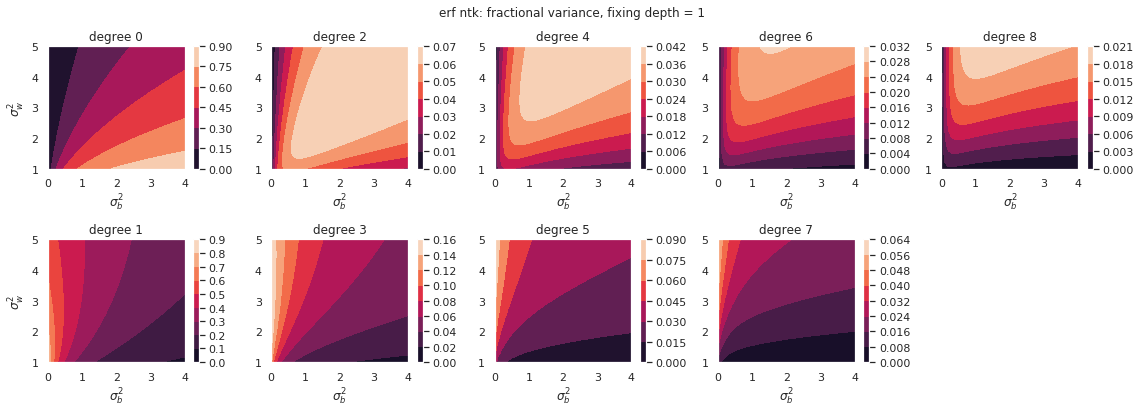

In [24]:
erf_plot_depthslices(1, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 1')

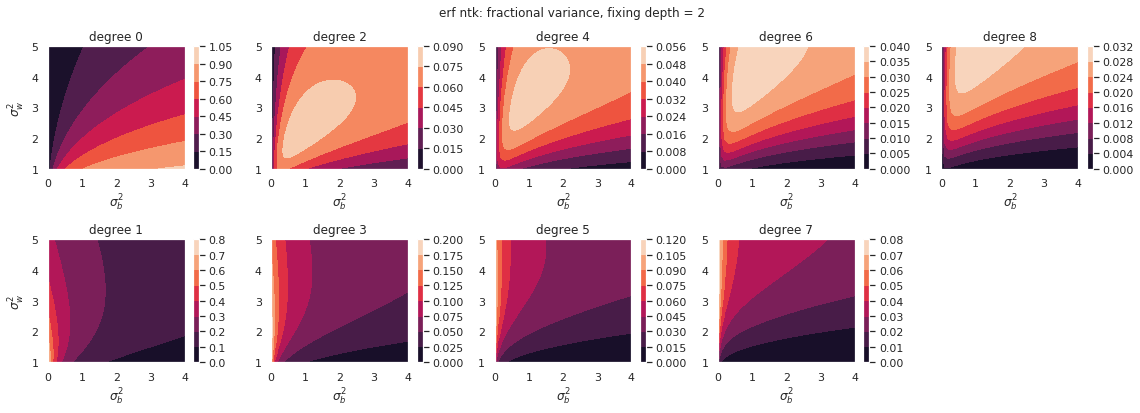

In [25]:
erf_plot_depthslices(2, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 2')

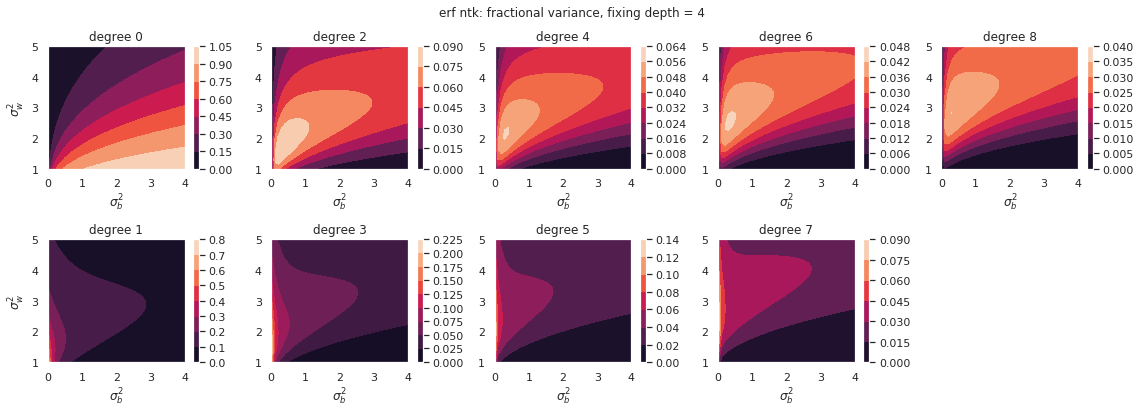

In [26]:
erf_plot_depthslices(4, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 4')

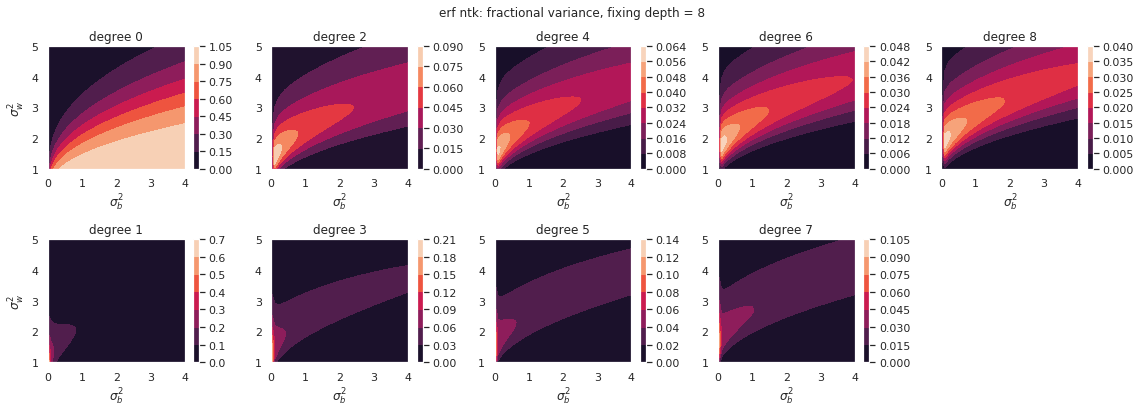

In [27]:
erf_plot_depthslices(8, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 8')

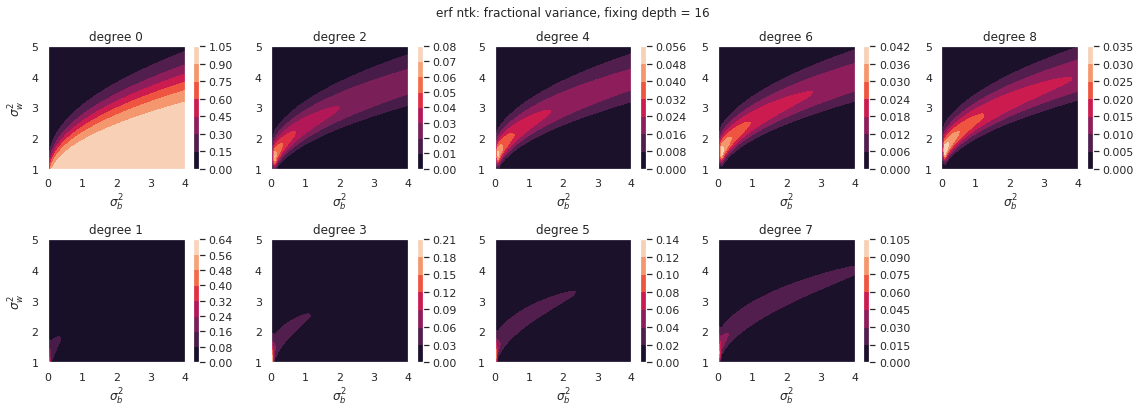

In [28]:
erf_plot_depthslices(16, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 16')

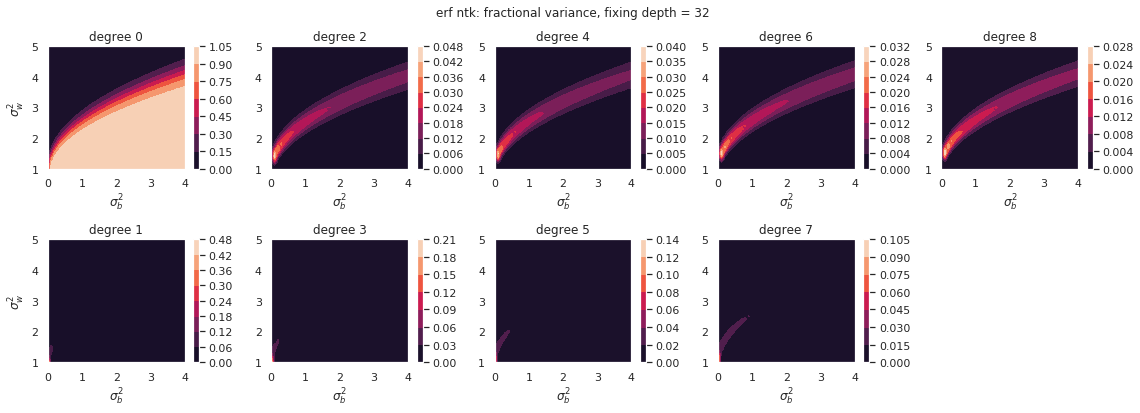

In [29]:
erf_plot_depthslices(32, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 32')

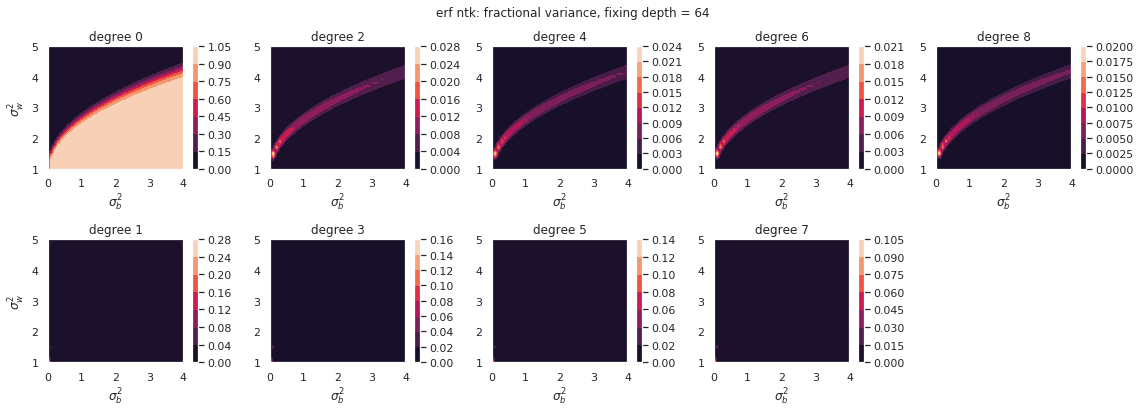

In [30]:
erf_plot_depthslices(64, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 64')

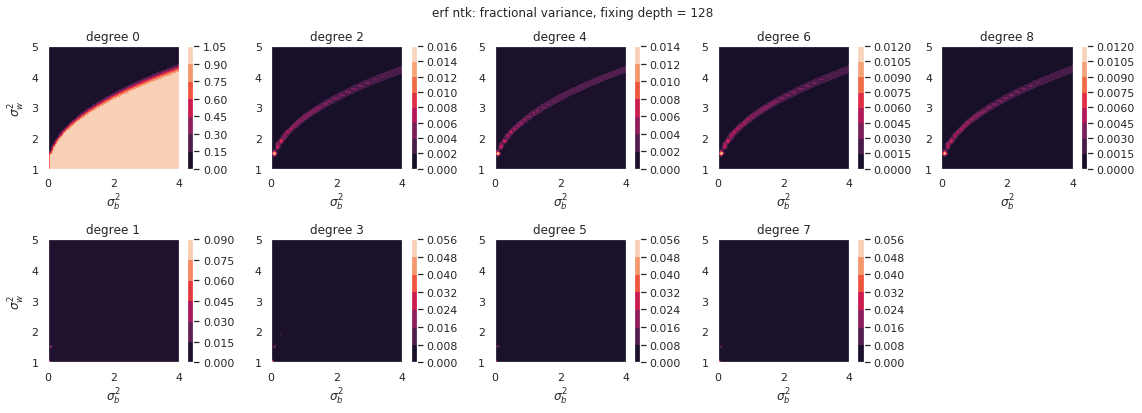

In [31]:
erf_plot_depthslices(128, 'ntkfracvar', u'erf ntk: fractional variance, fixing depth = 128')

Note that the purple curve seen above in high depth plots is the same as the *critical curve* of sampling hyperparameters ($\sigma_w^2$, $\sigma_b^2$) discovered by [Poole et al.](http://arxiv.org/abs/1606.05340), [Schoenholz et al.](http://arxiv.org/abs/1611.01232) that avoid gradient vanishing or gradient explosion.

## CK

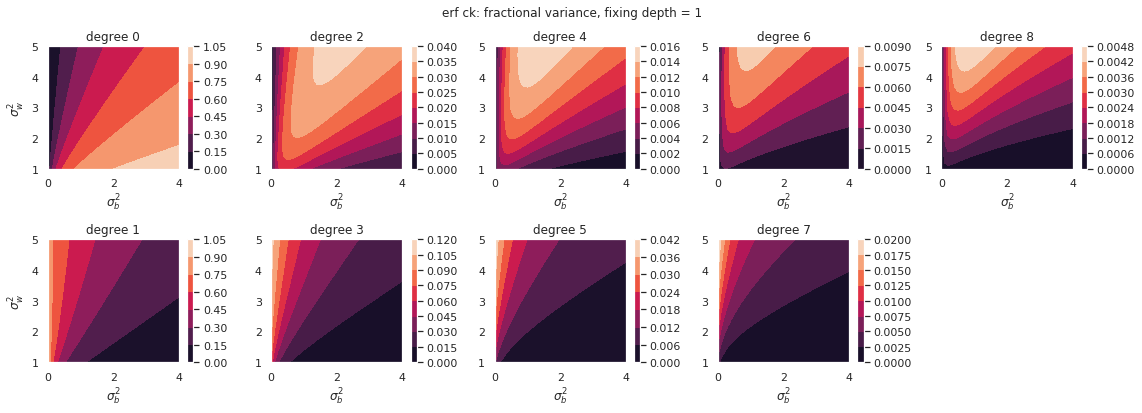

In [32]:
erf_plot_depthslices(1, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 1')

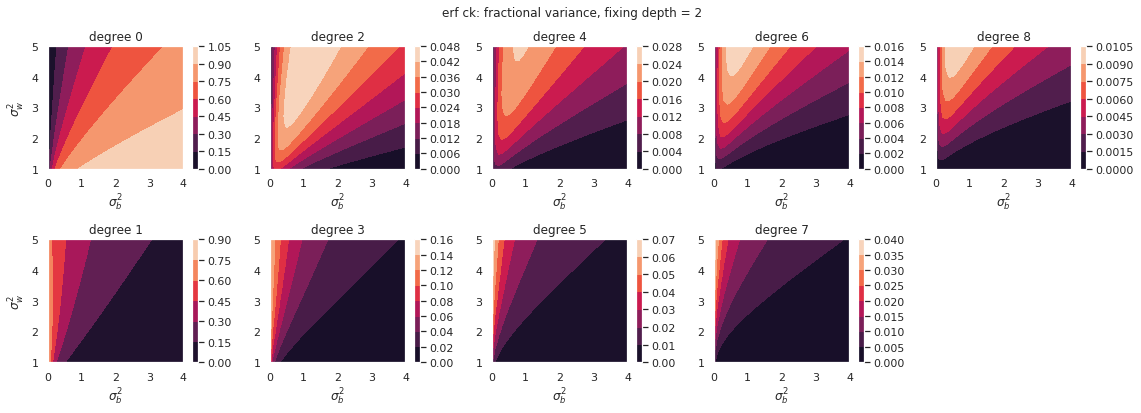

In [33]:
erf_plot_depthslices(2, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 2')

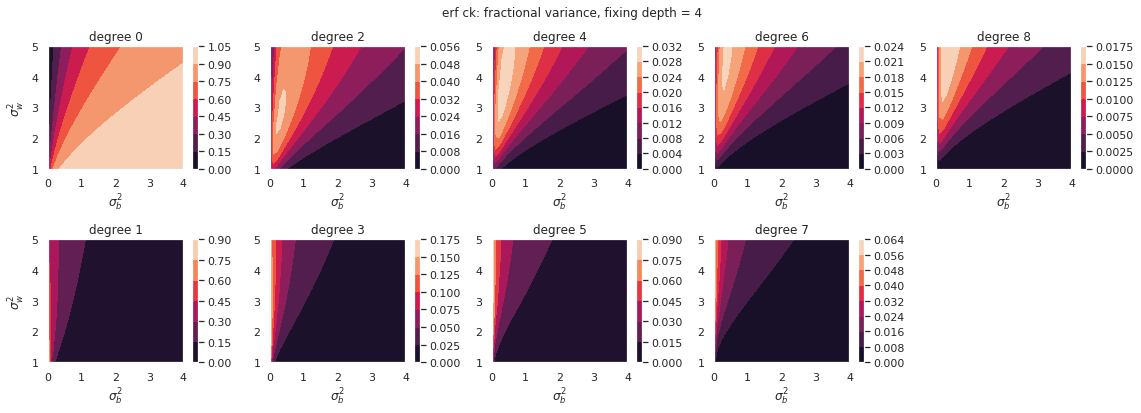

In [34]:
erf_plot_depthslices(4, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 4')

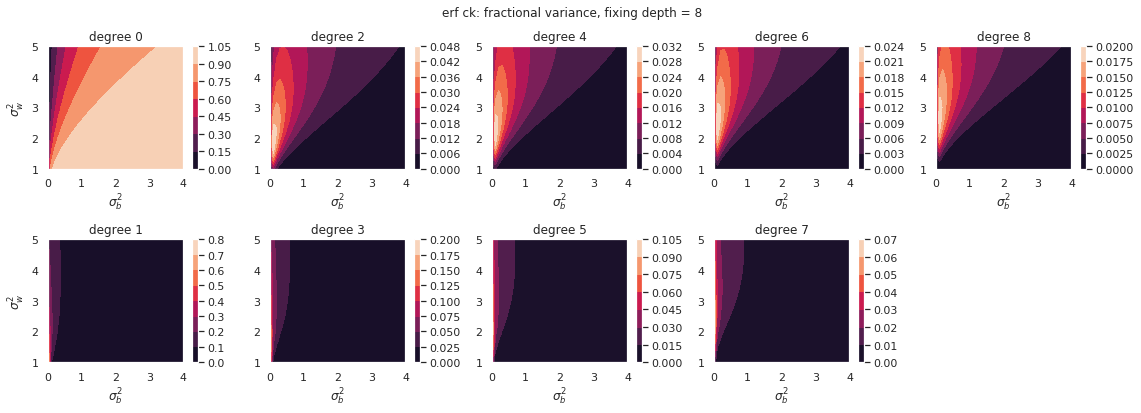

In [35]:
erf_plot_depthslices(8, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 8')

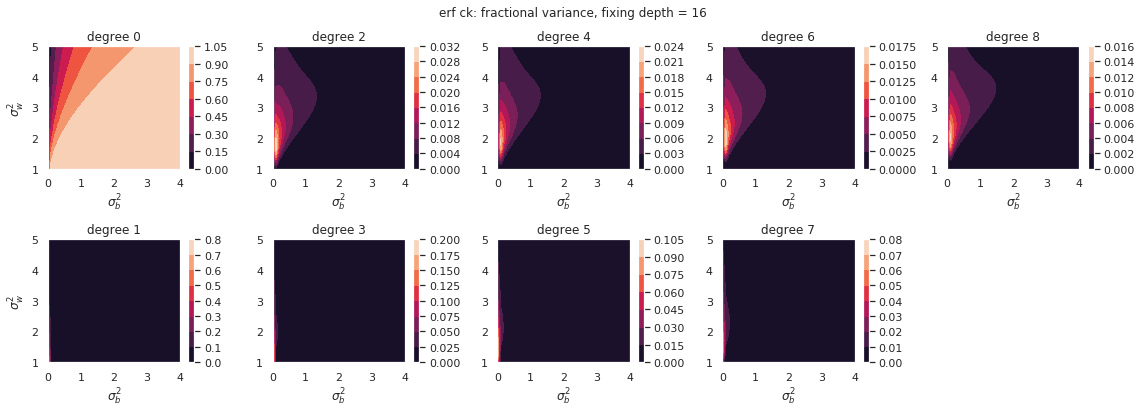

In [36]:
erf_plot_depthslices(16, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 16')

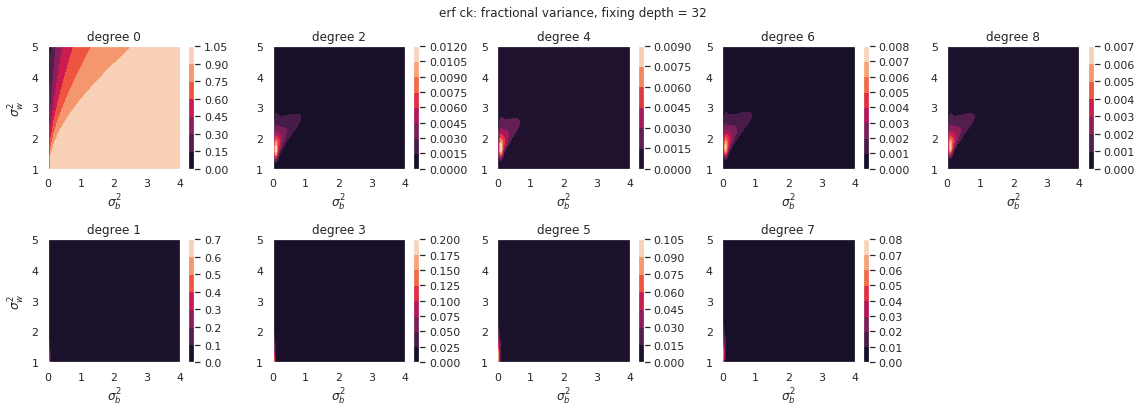

In [37]:
erf_plot_depthslices(32, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 32')

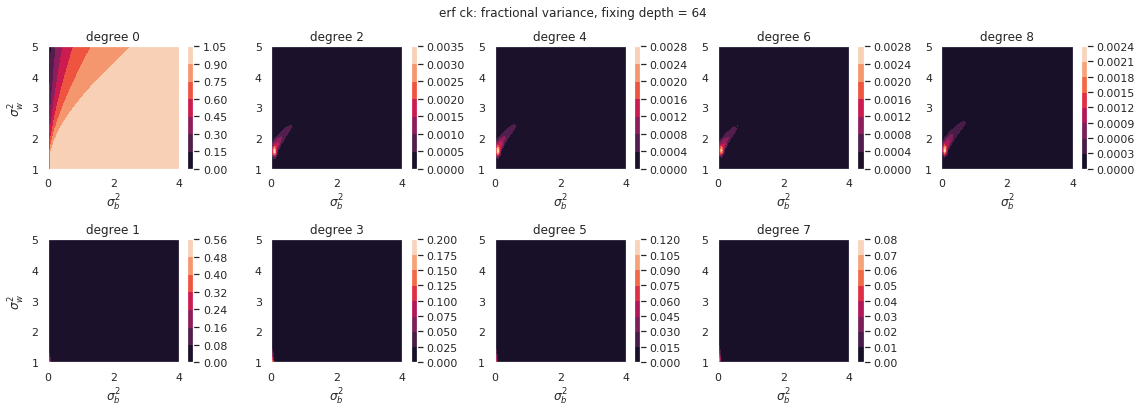

In [38]:
erf_plot_depthslices(64, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 64')

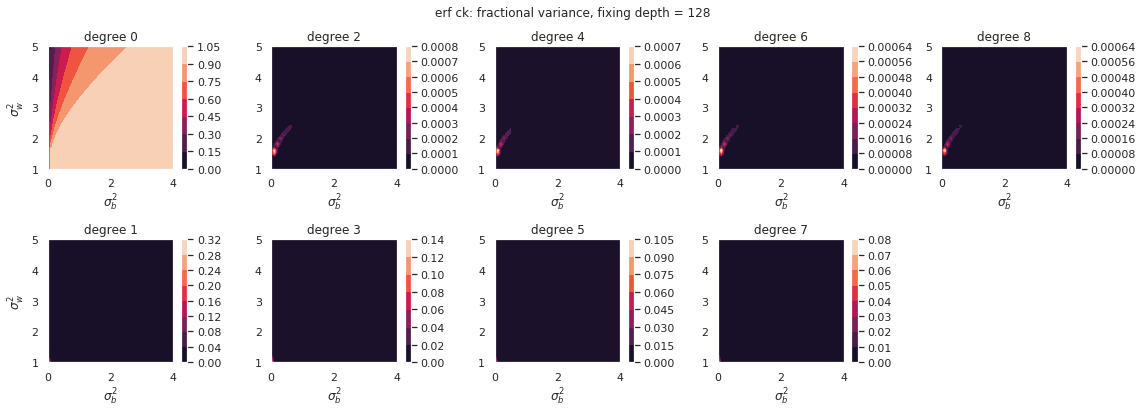

In [39]:
erf_plot_depthslices(128, 'ckfracvar', u'erf ck: fractional variance, fixing depth = 128')

Note that the purple curve seen above in high depth plots is the same as the *critical curve* of sampling hyperparameters ($\sigma_w^2$, $\sigma_b^2$) discovered by [Poole et al.](http://arxiv.org/abs/1606.05340), [Schoenholz et al.](http://arxiv.org/abs/1611.01232) that avoid gradient vanishing or gradient explosion.

# Erf Fractional Variances, as Functions of Depth and $\sigma_b^2$, Sliced by Fixed Values of $\sigma_w^2$

## NTK

In [40]:
def erf_plot_vwslices(vwidx, tp, title):
    plt.figure(figsize=(16, 6))
    vbdepth_grid = np.meshgrid(erfvbrange, np.arange(1, 129), indexing='ij')
    for i, deg in enumerate(list(range(0, 9, 2)) + list(range(1, 9, 2))):
        plt.subplot(2,5,i+1)
        plt.contourf(vbdepth_grid[0], vbdepth_grid[1], erfeigs[tp][deg][1:, vwidx, :].T)
        plt.xlabel(u"$\sigma_b^2$")
        if i in [0, 5]:
            plt.ylabel('depth')
        plt.semilogy()
        plt.title('degree {}'.format(deg))
        plt.colorbar()
    plt.suptitle(title)
    tight_layout(plt)

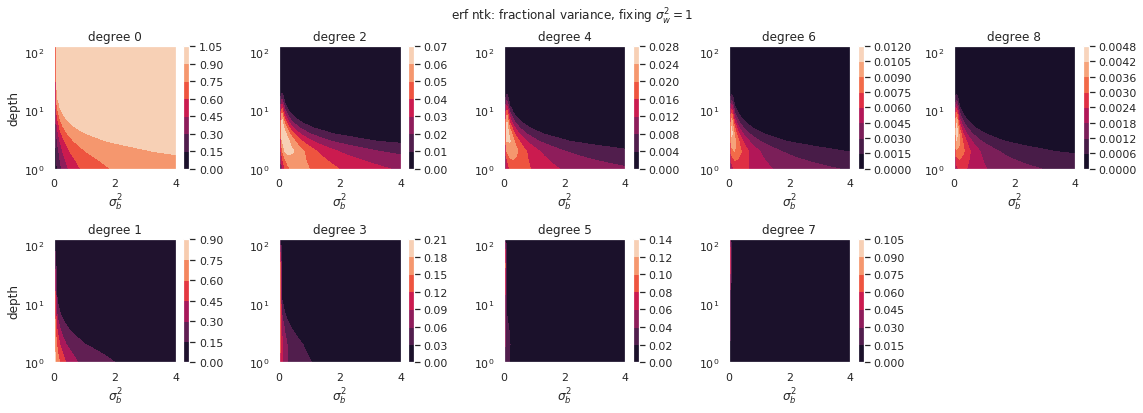

In [41]:
erf_plot_vwslices(0, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_w^2 = 1$')

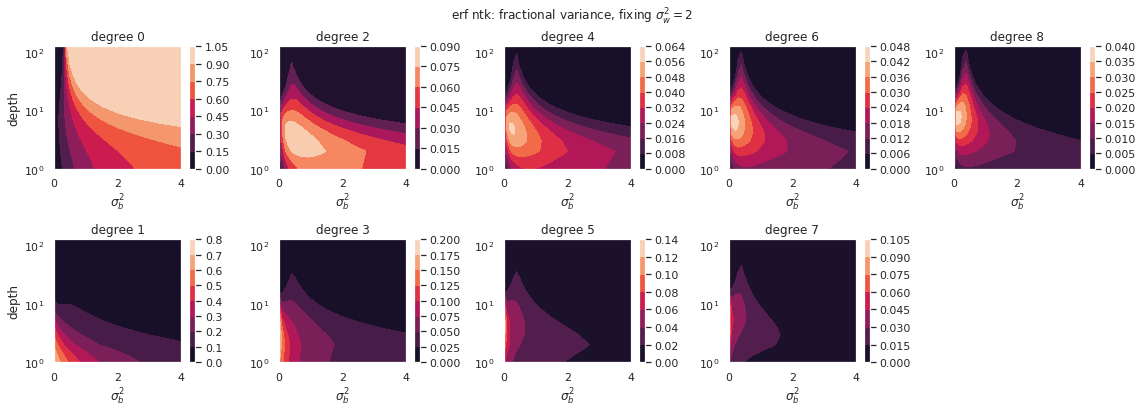

In [42]:
erf_plot_vwslices(10, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_w^2 = 2$')

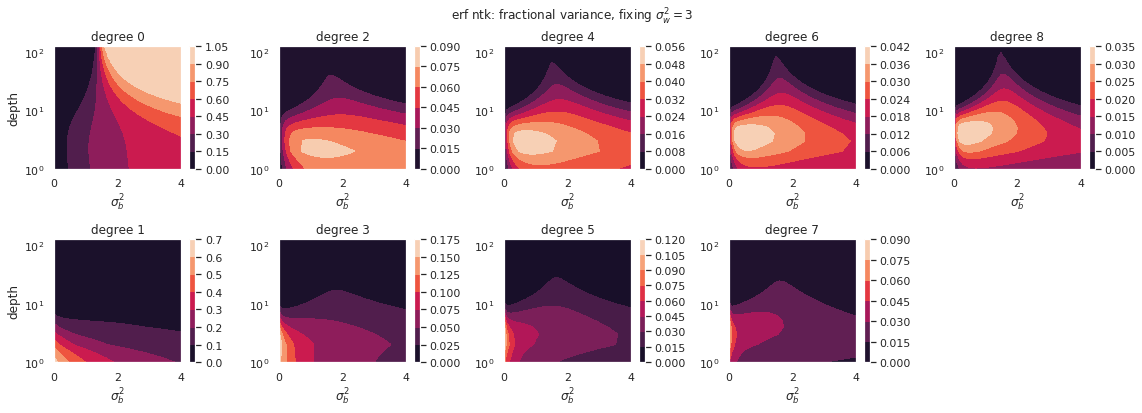

In [43]:
erf_plot_vwslices(20, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_w^2 = 3$')

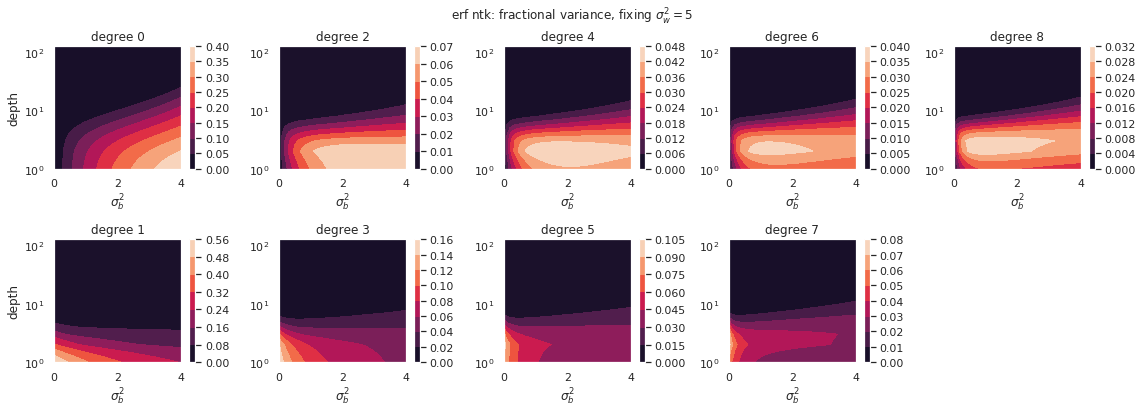

In [44]:
erf_plot_vwslices(40, 'ntkfracvar', u'erf ntk: fractional variance, fixing $\sigma_w^2 = 5$')

## CK

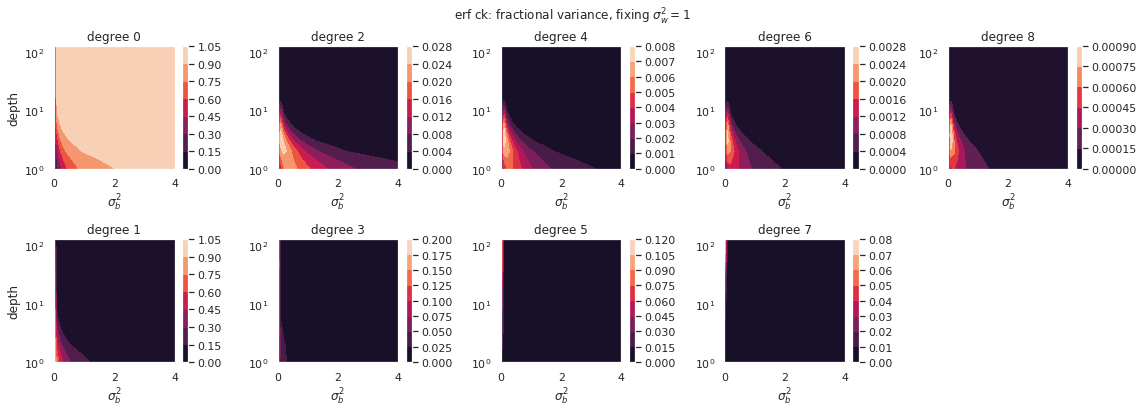

In [45]:
erf_plot_vwslices(0, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_w^2 = 1$')

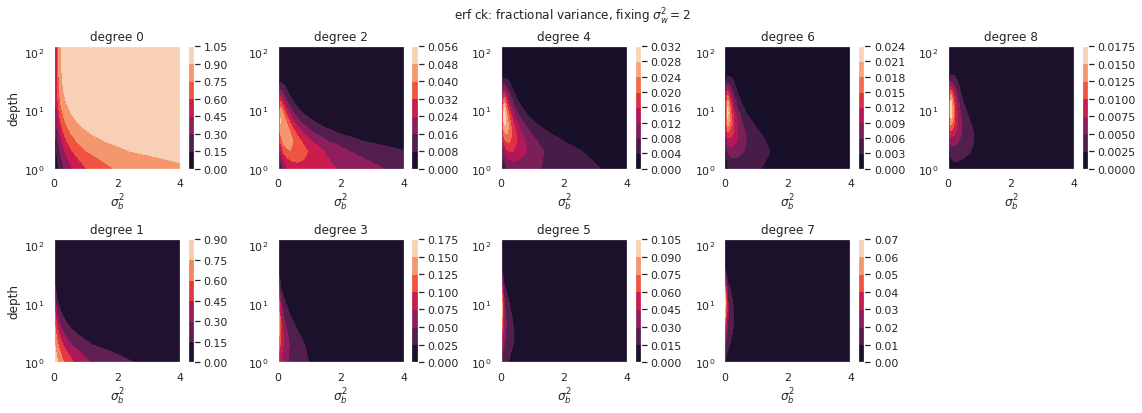

In [46]:
erf_plot_vwslices(10, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_w^2 = 2$')

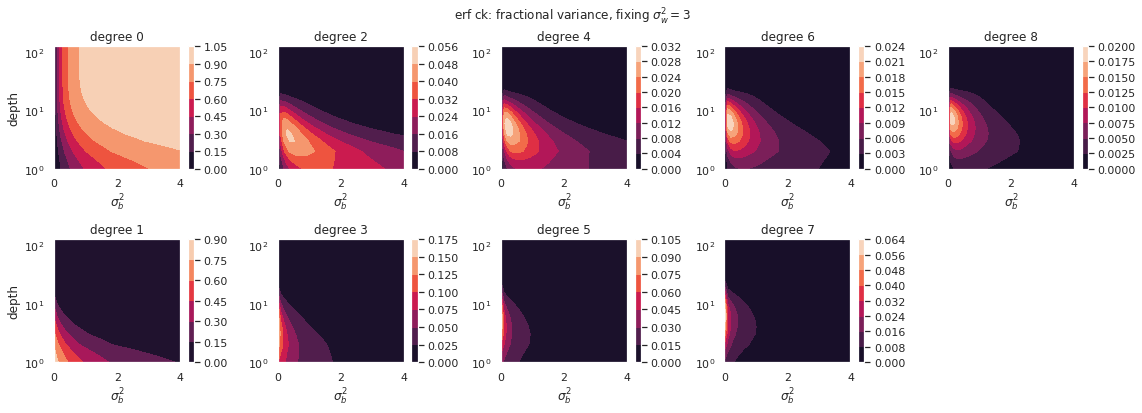

In [47]:
erf_plot_vwslices(20, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_w^2 = 3$')

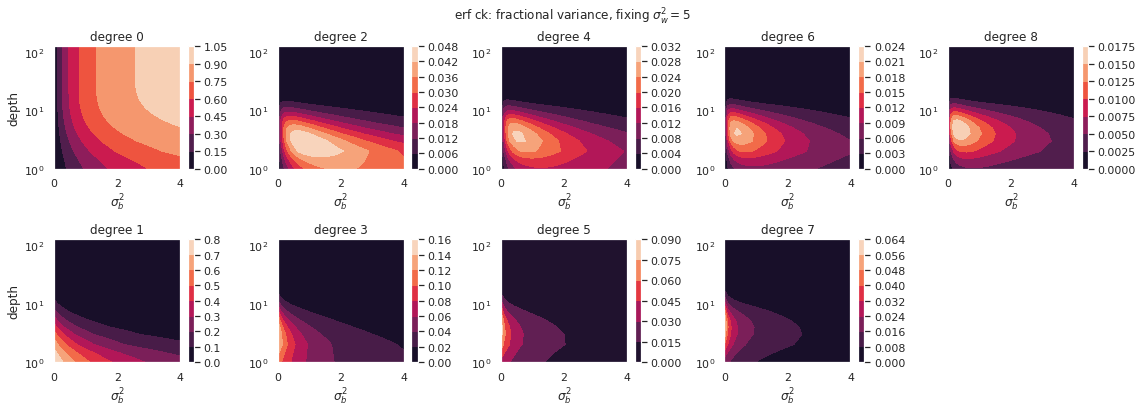

In [48]:
erf_plot_vwslices(40, 'ckfracvar', u'erf ck: fractional variance, fixing $\sigma_w^2 = 5$')

# 3D Contour Plots of Erf Fractional Variances, as Functions of Depth, $\sigma_w^2$, and $\sigma_b^2$

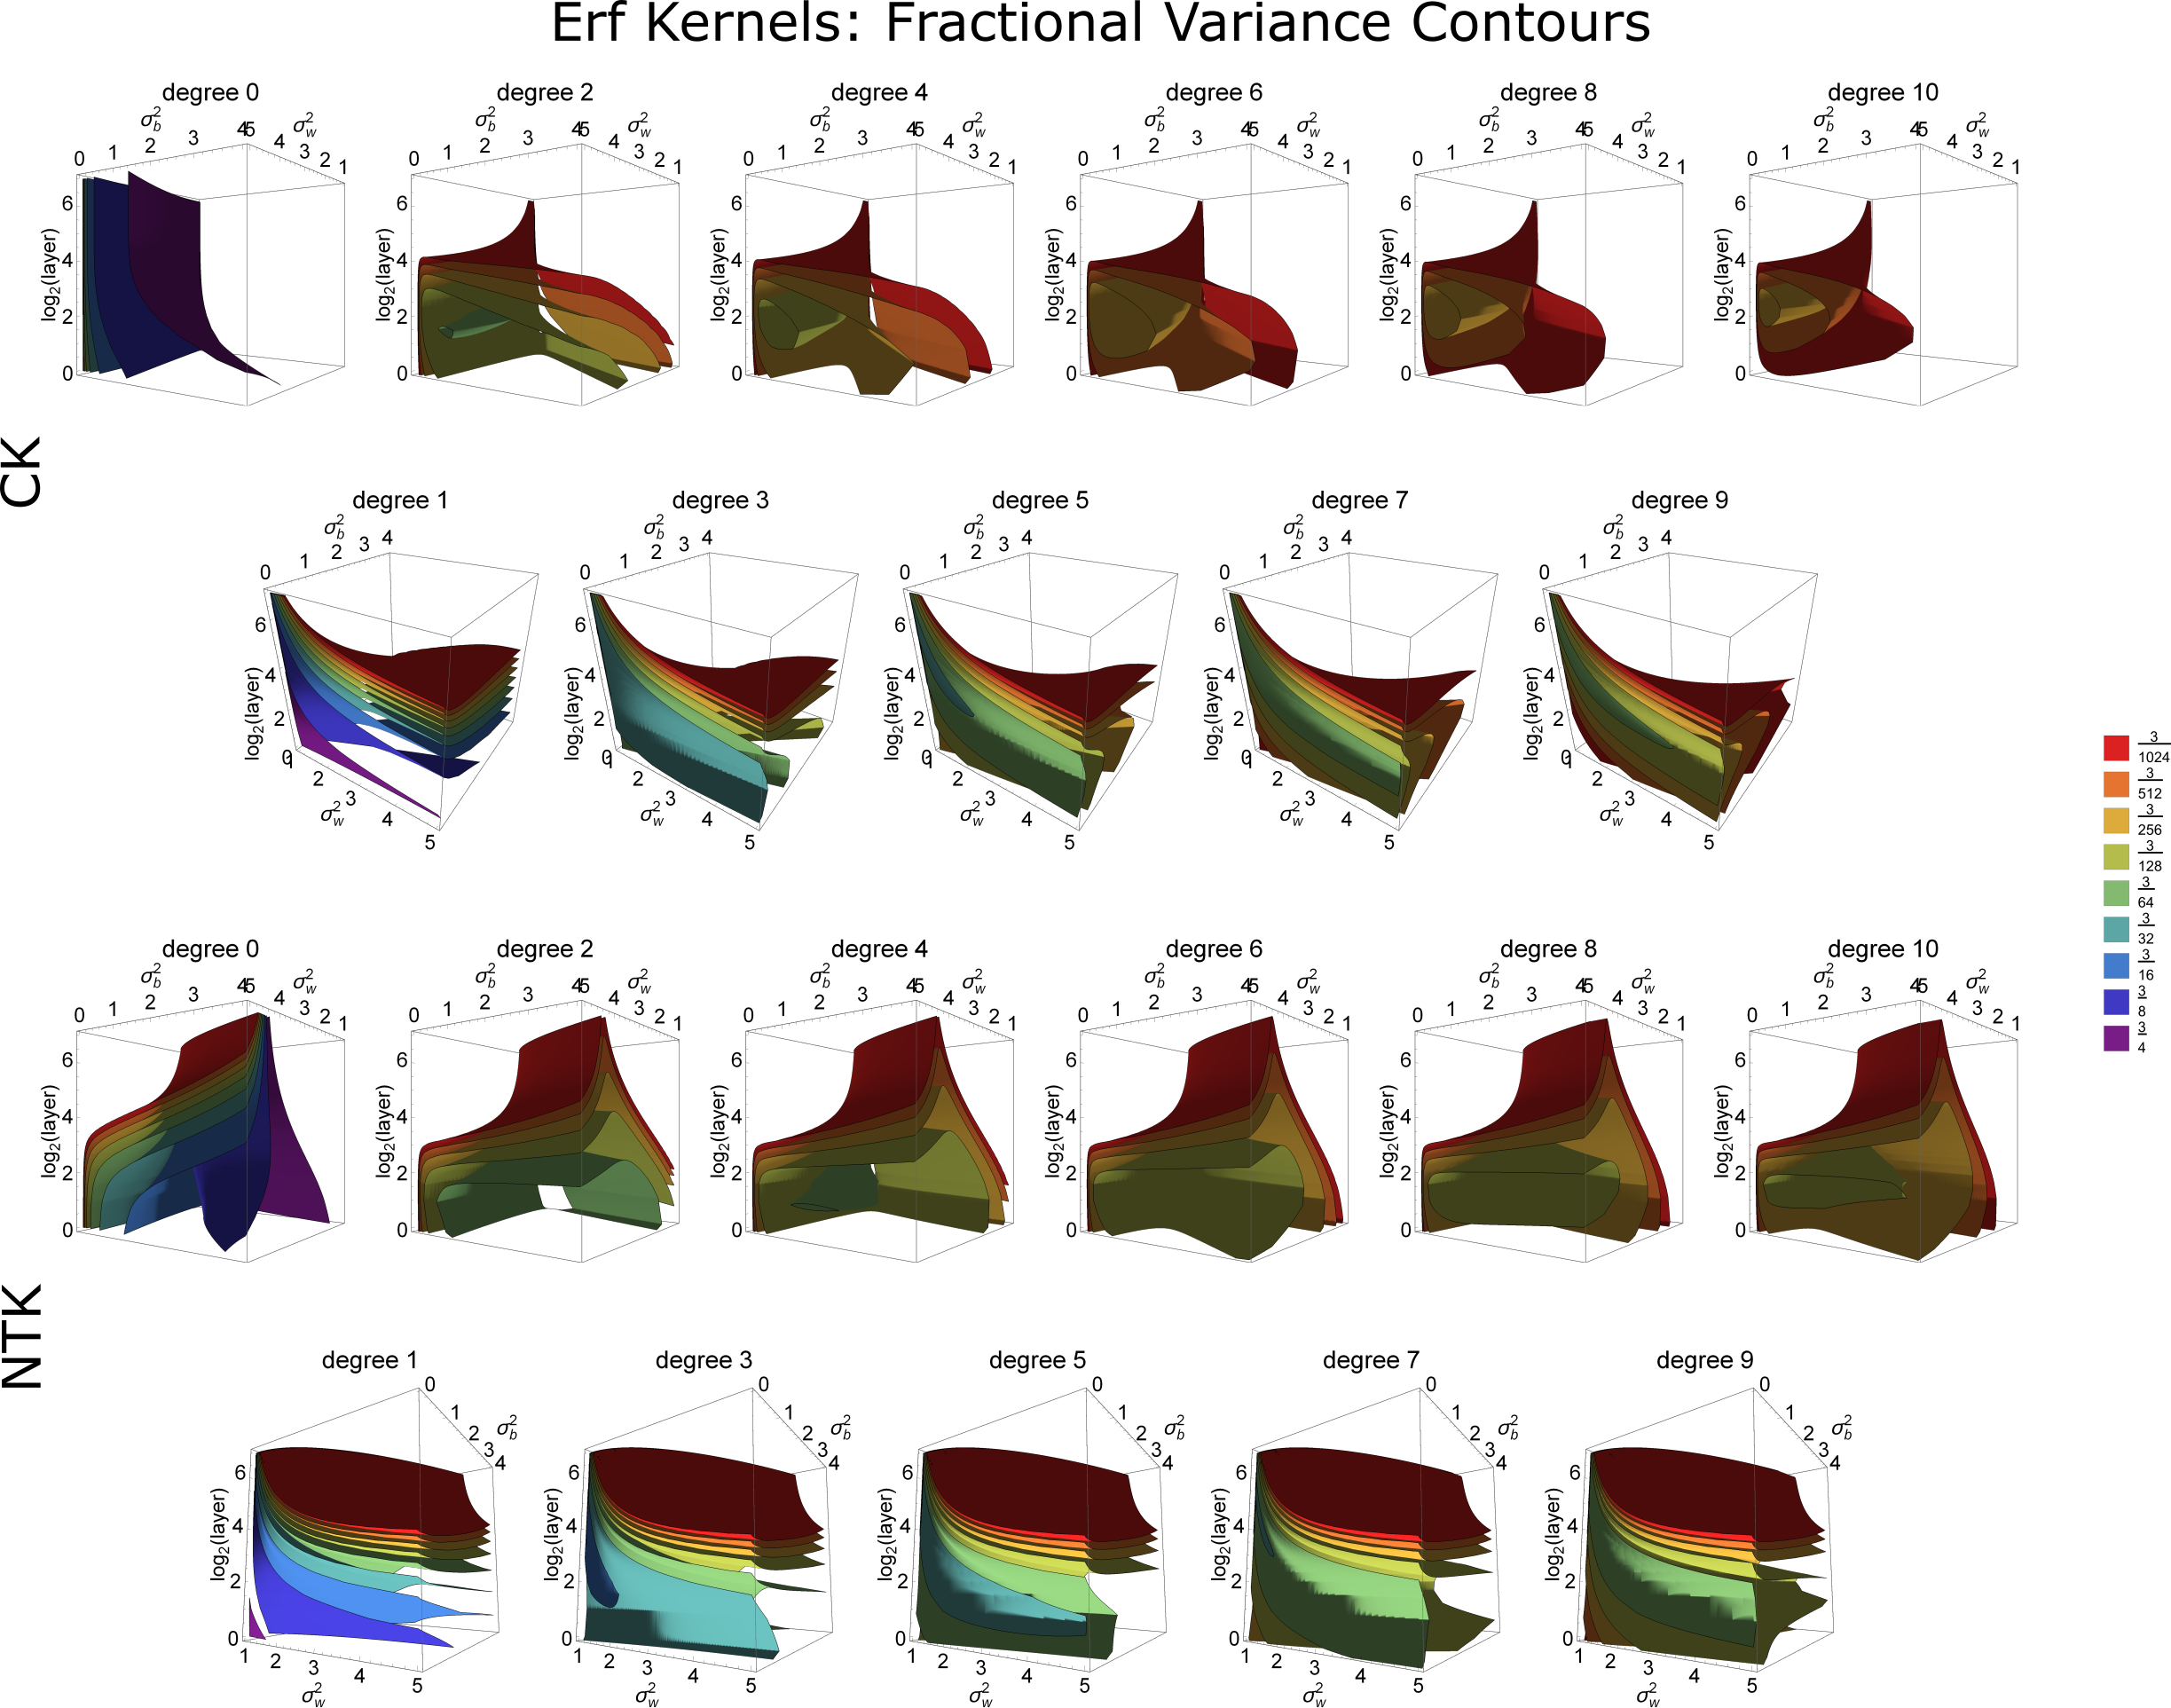

In [49]:
from IPython.display import Image
Image(filename='contourplotErfLabeled.png') 

For each value of fractional variance, as given in the legend on the right, we plot the level surface in the $(\sigma_w^2, \sigma_b^2, \log_2(\mathrm{depth}))$-space achieving this value in the corresponding color.
The closer to blue the color, the higher the value.
Note that the contour for the highest values in higher degree plots "floats in mid-air", implying that there is an optimal depth for learning features of that degree that is not particularly small nor particularly big.